<small><small><i>
Basado en trabajo de otros autores:
    
* [Openc CV Basics](https://gist.github.com/magsol/7757997)

* Thiago Santos - [Tutorial: SciPy and OpenCV as an interactive computing environment for computer vision](https://github.com/thsant/scipy4cv)
</small></small></i>

#  <center> Introducción a Open CV</center>
<img src="files/open_CV.png" width="250">


**Open CV** es un libreria para el procesamiento digital de imagenes. Con esta libreria se pueden cargar y guardar imagenes, modificarlas, obtener estadisticas de las imagenes, y utilizar filtros utiles para aplicaciones de vision por computador (clasificacion de objetos, deteccion de objetos, analisis de movimiento etc)

install command for Linux: python -m pip install opencv-contrib-python


### <p style="background-color:#33DAFF; color:#fff;padding:15px; font-weight:bold">1. Formación de Imagenes</p>

<tr>
<td> <img src="files/camera.jpg" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="files/retina.jpg" alt="Drawing" style="width: 500px;"/> </td>
</tr>

<tr>
<td> <img src="files/cmos.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="files/cmos_pic.jpg" alt="Drawing" style="width: 500px;"/> </td>
</tr>

<small><small><i>
Credito de Imagenes
- Wikimedia; Photoaxe
- Web Vision: Organization of the Retina and Visual System
<small><small><i>

### <p style="background-color:#52FF33; color:#fff;padding:15px; font-weight:bold">2. Representación de Imagenes</p>

Las imagenes son guardadas como matrices o Tensores (matrices de multiples dimensiones), las cuales podemos manipular usando **Numpy**

**Cargando Imagenes:**
- cv2.IMREAD_COLOR (1): Loads a color image. Any transparency of image will be neglected. It is the default flag.
- cv2.IMREAD_GRAYSCALE (0): Loads image in grayscale mode
- cv2.IMREAD_UNCHANGED (-1): Loads image as such including alpha channel

(-0.5, 563.5, 704.5, -0.5)

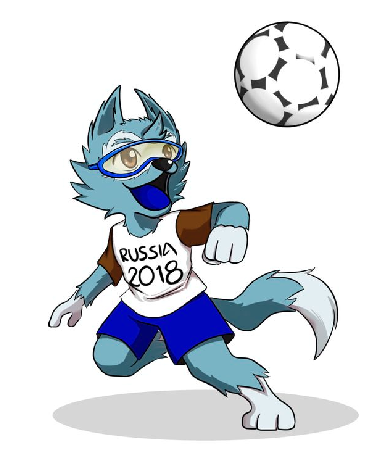

In [1]:
import cv2 # Open CV
import numpy as np # Numpy
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 8]

# Cargar imagen
file_name = "zabivaka.jpg"
img = cv2.imread(file_name, 1) # 1= Cargar imagen a color, en formato BGR

# mostrar imagen
plt.imshow(img) # Imagen mostada erroneamente dada imagen BGR, y plt espera formato RGB
plt.axis('off') # quitar ejes de la grafica impresa por plt

Una imagen a color no solo tendra filas y columna, si no que tambien incluira una tercera dimension indexando cada una de las capas que compone la imagen (Rojo, Verde, y Azul: RGB por sus siglas en ingles). 

**Por default las capas de la imagene son cargadas en el orden BGR ... pero podemos convertilar al formato RGB**

(-0.5, 563.5, 704.5, -0.5)

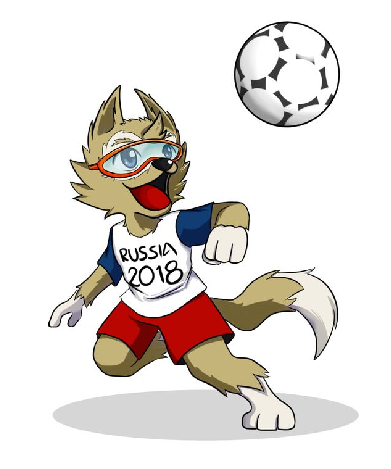

In [2]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convertir a formato RGB
plt.imshow(img)
plt.axis('off') 

Si convertimos la imagen a **Escala de Grises**, cada pixel sera representado por un solo numero (ya que solo tendremos una capa)

229
223


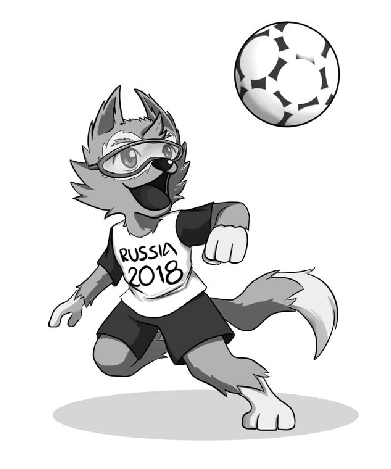

In [3]:
# Escala de Grises
img_gray = cv2.imread(file_name, 0) # 0--> Indica cargar en escala de grises

# Visualiza
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

# Obtener valor de un pixel en la capa Roja de la imagen RGB,
print(img[250, 250,0])

# Obtener el valor de un pixel de la imagen a escala de grises
print(img_gray[250, 250])

La imagen, al ser un arreglo Numpy tambien puede ser indexado para obtener un porcion de la imagen

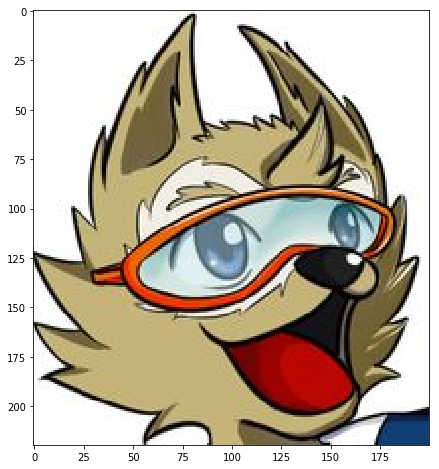

In [4]:
# Cargar imagen
file_name = "zabivaka.jpg"
img = cv2.imread(file_name, 1) # 1= Cargar imagen a color, en formato BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convertir a formato RGB

# Obtener una seccion de la imagen
porcion = img[120:340,60:260]
plt.imshow(porcion)

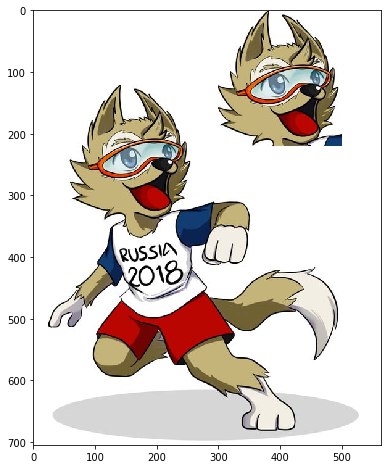

In [5]:
# Reemplazar una parte de la imagen por la porcion que obtuvimos anteriormnete
img[0:220,300:500] = porcion
plt.imshow(img)

### <p style="background-color:#C70039; color:#fff;padding:15px; font-weight:bold">3. Operaciones Aritmeticas con Señales</p>

Al ser arreglos de Numpy, las imagenes pueden ser manipuladas aritmeticamente

(-0.5, 479.5, 359.5, -0.5)

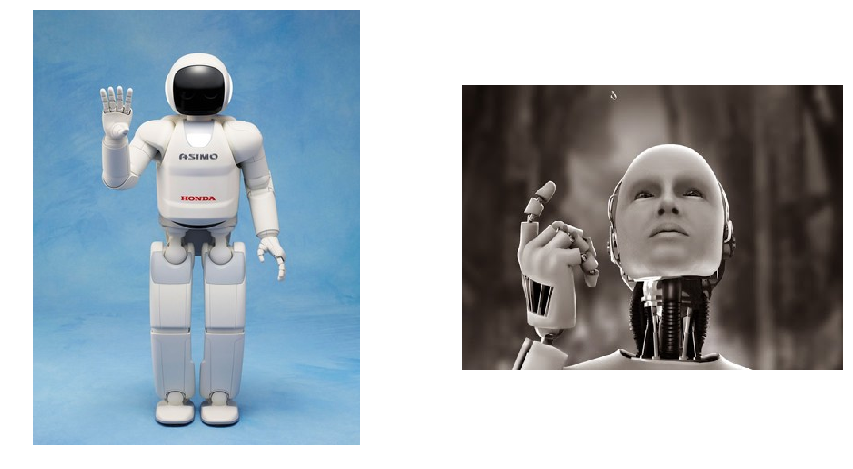

In [6]:
import cv2 # Open CV
import numpy as np # Numpy
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 8]


# Cargar y Convertir a RGB dos imagenes
im1 = cv2.imread('asimo.jpg')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) # convertir a formato RGB
im2  = cv2.imread('robot.jpg')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) # convertir a formato RGB

# Mostrar Imagenes
fig, (ax1, ax2) = plt.subplots(ncols=2) # creat multiples ejes (secciones donde se ponen las imagenes)
ax1.imshow(im1)
ax2.imshow(im2)
ax1.axis('off')
ax2.axis('off')

(-0.5, 479.5, 359.5, -0.5)

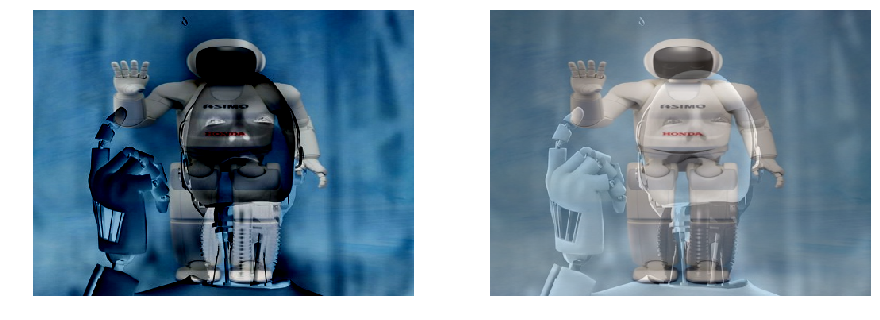

In [7]:
# Para sumar/rester las dos imagenes, primero debemos asegurarnos que sean del mismo tamaño
im1_resized = cv2.resize(im1, (im2.shape[1],im2.shape[0]))
subs = cv2.subtract(im1_resized, im2)
suma_ponderada = cv2.addWeighted(im1_resized, 0.6, im2, 0.4, 0)

# Mostrar Imagenes
fig, (ax1, ax2) = plt.subplots(ncols=2) # creat multiples ejes (secciones donde se ponen las imagenes)
ax1.imshow(subs)
ax2.imshow(suma_ponderada)
ax1.axis('off')
ax2.axis('off')


In [8]:
"""
Parameters
----------
image : ndarray
    Input image data. Will be converted to float.
mode : str
    One of the following strings, selecting the type of noise to add:

    'gauss'     Gaussian-distributed additive noise.
    'poisson'   Poisson-distributed noise generated from the data.
    's&p'       Replaces random pixels with 0 or 1.
    'speckle'   Multiplicative noise using out = image + n*image,where
                n is uniform noise with specified mean & variance.

"""

def noisy (noise_typ, image, var=0.001, amount= 0.05):
    
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 5 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)*np.sqrt(var)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

(-0.5, 359.5, 479.5, -0.5)

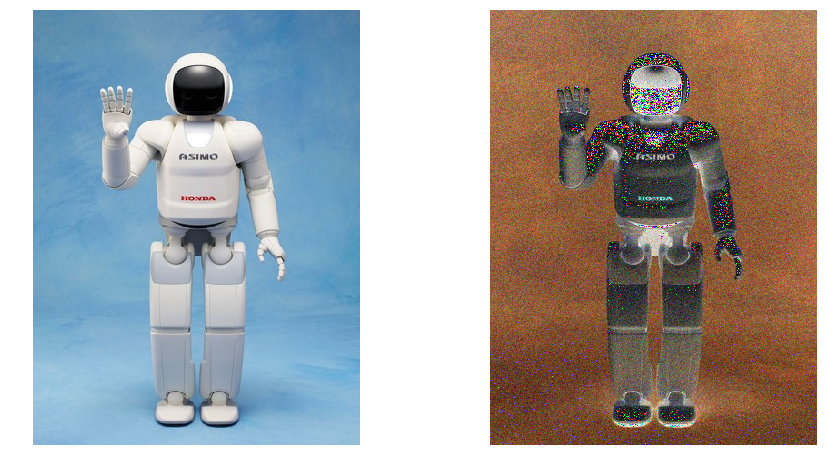

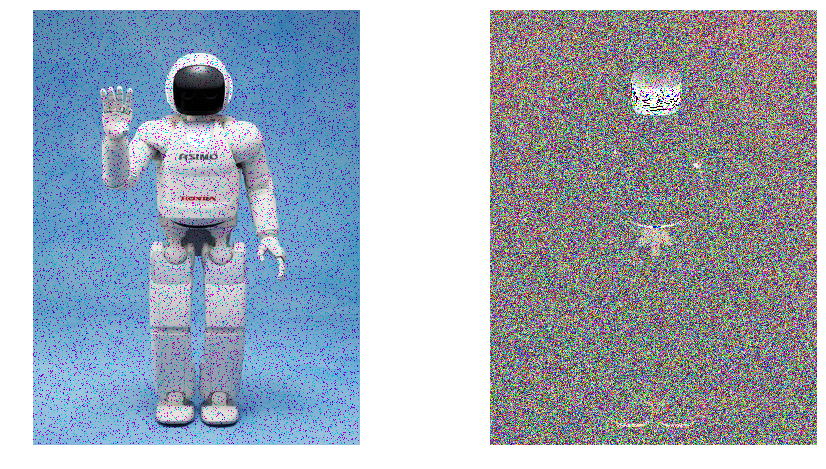

In [9]:
#tipos de ruido  'gauss', 'poisson' , 's&p', 'speckle'
var = 0.005
img_gauss = noisy('gauss', im1, var = var)
amount = 0.05
img_s_p = noisy('s&p', im1, amount=amount)
var = 90E-7
img_speckle = noisy('speckle', im1, var=var)


# Mostrar Imagenes
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2)
ax1.imshow(im1)
ax2.imshow(img_gauss)

fig, (ax3, ax4) = plt.subplots(nrows = 1, ncols=2)
ax3.imshow(img_s_p)
ax4.imshow(img_speckle)

# Eliminar Ejes 
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')


### <p style="background-color:#AC00C7; color:#fff;padding:15px; font-weight:bold">4. Transformaciones Geometricas </p>

**Data Augmentation**: Cuando queremos entrenar un modelo de Machine Learning pero tenemos pocos datos, podemos generar artificialmente nuevos datos aplicando transformaciones geometrics (rotacion, flip) y adicionando señales encima de 

**Rotacion**: Crear matriz de rotacion M especificando el punto desde el cual se quiere hacer la transformacion (**centro**), el **angulo** y la **escala**

(-0.5, 359.5, 479.5, -0.5)

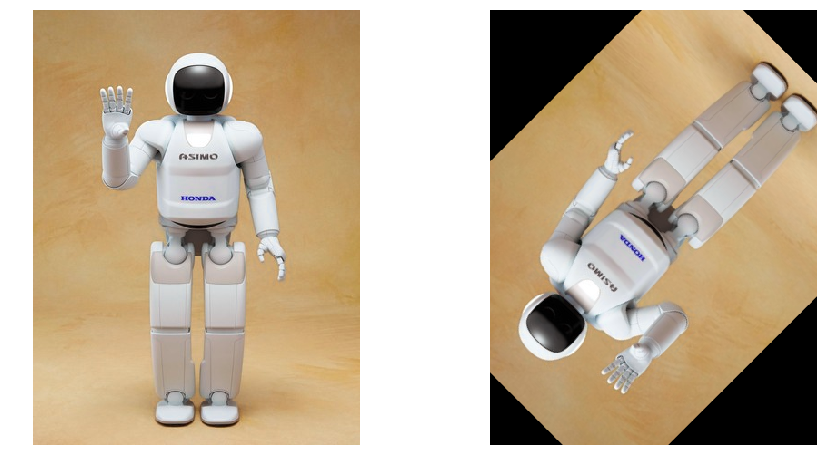

In [10]:
img  = cv2.imread('robot.jpg', 1)
img = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) # convertir a formato RGB

# Rotacion
rows,cols, _ = img.shape
angulo = 135
M = cv2.getRotationMatrix2D((cols/2,rows/2),angulo,1) # Matriz de Rotacion,parametros: (centro, angulo, escala) 
img_rot = cv2.warpAffine(img, M, (cols,rows))

# Visualizar
fig, (ax1, ax2) = plt.subplots(ncols=2) # creat multiples ejes (secciones donde se ponen las imagenes)
ax1.imshow(img)
ax2.imshow(img_rot)
ax1.axis('off')
ax2.axis('off')

**Escala**

(-0.5, 359.5, 479.5, -0.5)

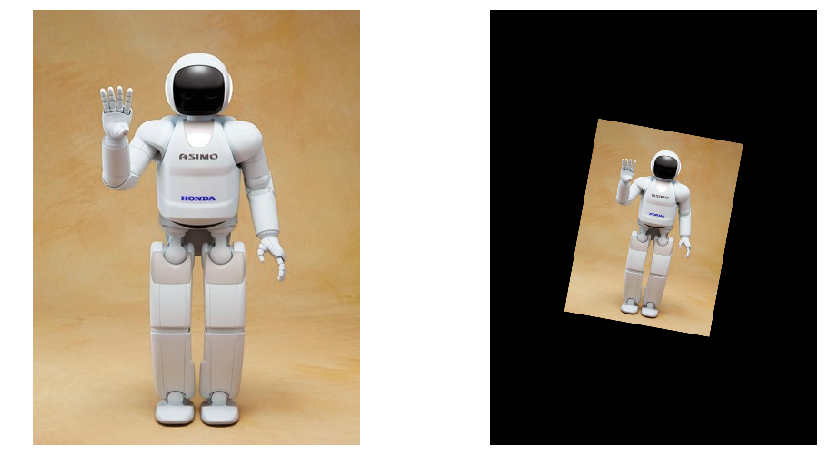

In [11]:
# Escala
angulo = -10
escala = 0.45
M = cv2.getRotationMatrix2D((cols/2,rows/2),angulo,escala) # Matriz de Rotacion,parametros: (centro, angulo, escala) 
img_scale = cv2.warpAffine(img, M, (cols,rows))

# Visualizar
fig, (ax1, ax2) = plt.subplots(ncols=2) # creat multiples ejes (secciones donde se ponen las imagenes)
ax1.imshow(img)
ax2.imshow(img_scale)
ax1.axis('off')
ax2.axis('off')

**Traslacion**: Especificamos los pixeles que queremos desplazar en cada eje **dx** y **mdy**

(-0.5, 359.5, 479.5, -0.5)

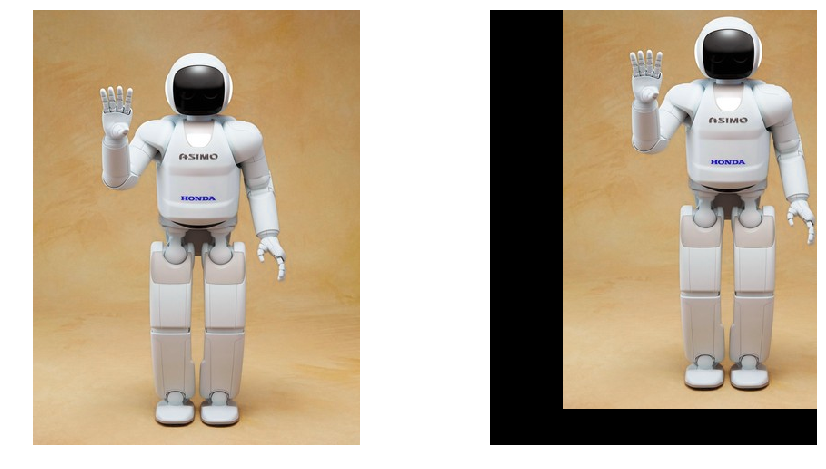

In [12]:
dx = 80
dy= -40
M = np.float32([[1,0,dx],[0,1,dy]])
img_tras = cv2.warpAffine(img,M,(cols,rows))
                     
# Visualizar
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(img)
ax2.imshow(img_tras)
ax1.axis('off')
ax2.axis('off')

**Affine Transformation**: en este tipo de transformacion, **todas las lineas que son paralelas en la imagen original permaneceran paralelas en la imagen transformada** ... por lo tanto debemos especicar  3 puntos de la imagen original (**pts1**) y la posicion a la cual las queremos transladar (**pts2**)

(-0.5, 359.5, 479.5, -0.5)

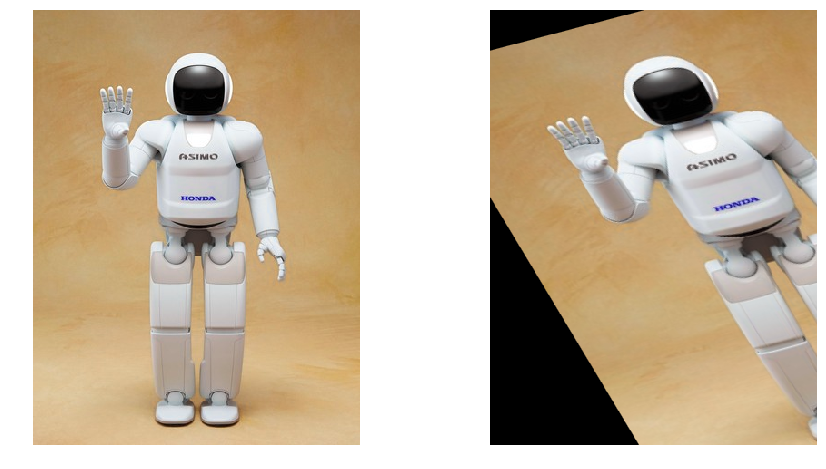

In [13]:
# Especificar puntos
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

# Crear y aplicar matriz de transformacion
M = cv2.getAffineTransform(pts1,pts2)
img_affine = cv2.warpAffine(img,M,(cols,rows))

# Visualizar
fig, (ax1, ax2) = plt.subplots(ncols=2) # creat multiples ejes (secciones donde se ponen las imagenes)
ax1.imshow(img)
ax2.imshow(img_affine)
ax1.axis('off')
ax2.axis('off')

### <p style="background-color:#0FE83D; color:#fff;padding:15px; font-weight:bold">5. Captura de Imagenes & Video  </p>

**Captura & Almacenamiento de Imagenes**

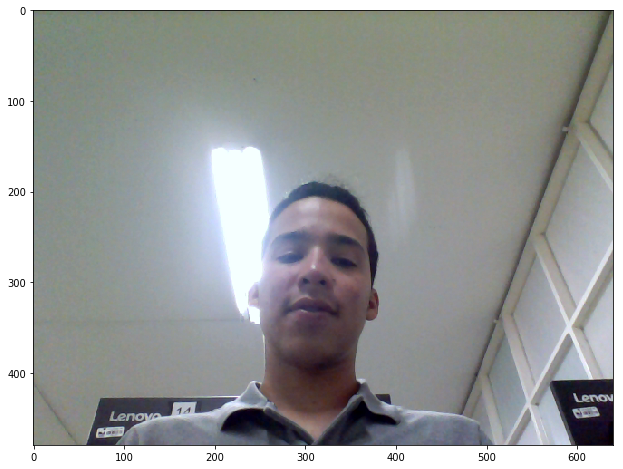

In [20]:
import cv2
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [15, 8]

# Creamos un objeto (variables con cietas atributos que la describen y ciertas funciones)
cap = cv2.VideoCapture(0) 

# Capturar cuadro
ret, frame = cap.read()

# Visualizar imagen capturada
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # convertimos a RGB UNICAMENTE para visualziacion
plt.show()

# Almacenar Captra: NOTA --> debe estar en formato BGR
cv2.imwrite("mi_captura.jpg", frame)

# Depejar la camara  
cap.release()

**Captura de Video**

In [15]:
# import cv2
# # Creamos un objeto (variables con cietas atributos que la describen y ciertas funciones)
# cap = cv2.VideoCapture(0) 


# # Mismo principio que la captura de imagenes, pero capturando una 
# # secuencia de cuadros en un loop (while) Infinito
# while(True):
#     # Capturar cuadro
#     ret, frame = cap.read()

#     # Visualizar imagen capturada
#     cv2.imshow('frame',frame)
    
#     # Terminar captura de video presionando la letra 'q'
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Depejar la camara y cerrar 
# cap.release()
# cv2.destroyAllWindows()

# """
# Para guardar el video en tu computar, puedes mirar este tutorial:
# http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html#saving-a-video
# """

### <p style="background-color:#C70039; color:#fff;padding:15px; font-weight:bold"> ----------- Machine Learning: Detección de Piel Usando Naive Bayes  ----------- </p>

En este ejericio aplicaremos una tecnica de machine learning llamada **Naive Bayes** el cual a traves de metodos muy simples es capaz de realizar clasificación. En nuestro caso queremos realizar **Segmentación Semantica**, asignando una etiquete (es piel o no es piel) a cada pixel de la imagen

**Aprendizaje Supervisado**
- Entrada: Imagen RGB
- Etiqueta: Mascara binaria indicando piel / No piel
- Salida: Predicción del modelo piel / No piel

(-0.5, 1023.5, 960.5, -0.5)

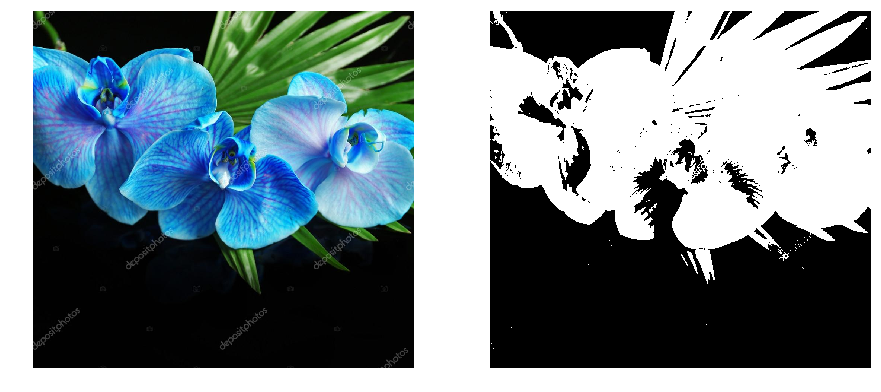

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 8]
from sklearn.naive_bayes import GaussianNB # Modelo de Machine Learning

# Cargar Imagen
img_bgr = cv2.imread('flower.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # Conversion a RGB
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)  #Conversion a LAB
M, N, _ = img_lab.shape

# Crear Etiqueta (mascara): 0 indica No piel, 1 indica piel
mascara = np.zeros((M,N)) # inicializar todos los valores como No piel (cero)
thr = 80 # Umbral para etiquetar piel / No piel
mascara[img_lab[:,:,0] > thr] = 1 # Hipotesis: todos los valores con Luminancia (canal 9) > thr --> es Piel

# Visualziar Imagen (entrada) y Mascara (Etiqueta)
fig, (ax1, ax2) = plt.subplots(ncols=2) 
ax1.imshow(img_rgb)
ax2.imshow(mascara, cmap ='gray')
ax1.axis('off')
ax2.axis('off')

In [11]:
# Nuestros datos de entrenamiento seran cada uno de los canales como columnas (1D) (no como imagenes 2D)
train_data = img_lab.reshape(M*N, -1)
train_data = train_data[:,1:] # Unicamente usaremos los canales A y B, ignorando el canal L

# Tambien transformamos las etiquetas
target = mascara.reshape(M*N)

# Con los datos de entrada (train_data) y las etiquetas (target), podemos entrenar nuestro modelo
gnb = GaussianNB() #inicializar
gnb.fit(train_data, target) # entrenar

GaussianNB(priors=None)

(-0.5, 187.5, 187.5, -0.5)

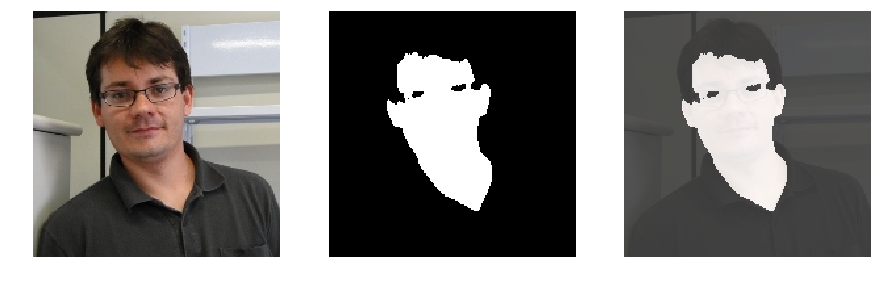

In [24]:
# Test: Una ves entrenado, podemos probar nuestro modelo con otra imagen nueva nunca antes vista

# Cargar Imagen de Test
img_test_bgr = cv2.imread('thiago.jpg')
img_test_rgb = cv2.cvtColor(img_test_bgr, cv2.COLOR_BGR2RGB) # Conversion a RGB
img_test_lab = cv2.cvtColor(img_test_bgr, cv2.COLOR_BGR2LAB)  # Conversion a LAB
M_test, N_test, _ = img_test_lab.shape

# Reshape datos de test 
test_data = img_test_lab.reshape(M_test * N_test, -1)[:,1:]
pred_piel = gnb.predict(test_data) # prediccion como un vector de dimensions (M_test * N_test) x 1
pred_piel_imagen = pred_piel.reshape(M_test, N_test) # convertir prediccion a la estructura 2D de una imagen

# Visualizar clasificacion
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3) 
ax1.imshow(img_test_rgb) # Imagen de Test RGB
ax2.imshow(pred_piel_imagen, cmap ='gray') # Prediccion del Modelo Binaria

# Superponer Entrada (imagen) y Segmentacion Semantica (salida del modelo)
ax3.imshow(img_test_rgb, alpha=0.35)
plt.imshow(pred_piel_imagen, cmap=plt.cm.binary_r, alpha=0.65)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

#### **Prueba si el clasificador es capaz de detectar tu piel capturando tu propia imagen :) **

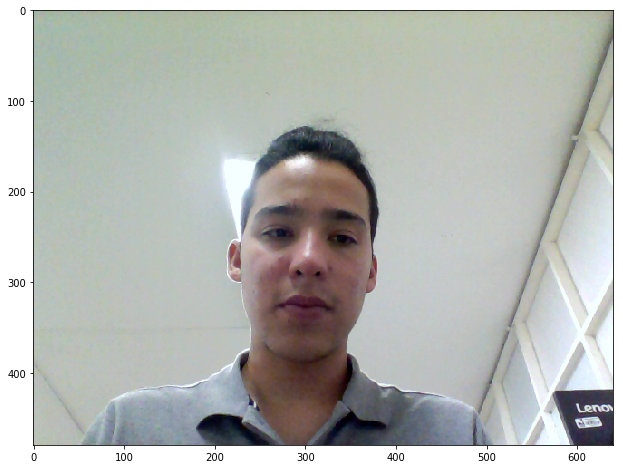

(-0.5, 639.5, 479.5, -0.5)

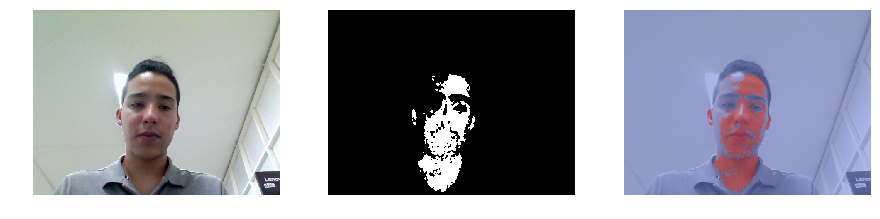

In [34]:
import cv2
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [15, 8]

""" Captura tu propia Imagen (acerca tu cara bastante a la camara )"""
# Creamos un objeto (variables con cietas atributos que la describen y ciertas funciones)
cap = cv2.VideoCapture(0) 

# Capturar cuadro
ret, frame = cap.read()

# Visualizar imagen capturadac 
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # convertimos a RGB UNICAMENTE para visualziacion
plt.show()

# Almacenar Captra: NOTA --> debe estar en formato BGR
cv2.imwrite("mi_captura.jpg", frame)

# Depejar la camara  
cap.release()

""" Prueba el Clasificador """
# Cargar Imagen de Test
img_test_bgr = cv2.imread('mi_captura.jpg')
img_test_rgb = cv2.cvtColor(img_test_bgr, cv2.COLOR_BGR2RGB) # Conversion a RGB
img_test_lab = cv2.cvtColor(img_test_bgr, cv2.COLOR_BGR2LAB)  # Conversion a LAB
M_test, N_test, _ = img_test_lab.shape

# Reshape datos de test 
test_data = img_test_lab.reshape(M_test * N_test, -1)[:,1:]
pred_piel = gnb.predict(test_data) # prediccion como un vector de dimensions (M_test * N_test) x 1
pred_piel_imagen = pred_piel.reshape(M_test, N_test) # convertir prediccion a la estructura 2D de una imagen

# Visualizar clasificacion
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3) 
ax1.imshow(img_test_rgb) # Imagen de Test RGB
ax2.imshow(pred_piel_imagen, cmap ='gray') # Prediccion del Modelo Binaria

# Superponer Entrada (imagen) y Segmentacion Semantica (salida del modelo)
ax3.imshow(img_test_rgb, alpha=0.7)
plt.imshow(pred_piel_imagen, cmap=plt.cm.coolwarm, alpha=0.4)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')